In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

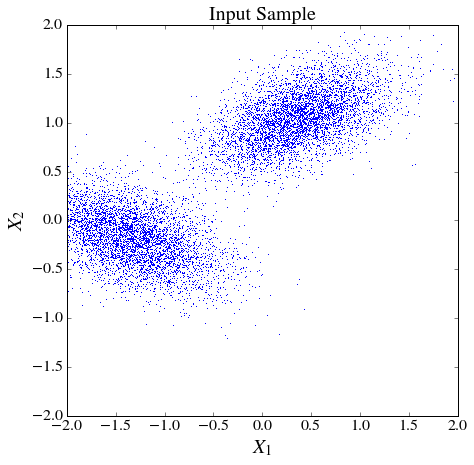

In [2]:
data = np.genfromtxt('test_kde3_data.csv')
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(data[:,0],data[:,1],',')
ax.set_xlabel(r'$X_1$', fontsize=20)
ax.set_ylabel(r'$X_2$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Input Sample', fontsize=20);
ax.set_xlim([-2,2]);
ax.set_ylim([-2,2]);

In [3]:
def plot_kde2d(kde2d_fname, ax=None, 
               vmin=None, vmax=None,
               nlevels=10, nlevels_f=50,
               linewidths=0.4,
               title=None, axis_fontsize=20, tick_labelsize=16):
    
    # read in the specialized file generated from kde_scan
    X, Y = None, None
    with open(kde2d_fname, 'r') as f:
        x = np.array(map(float, f.next().strip().split()))
        y = np.array(map(float, f.next().strip().split()))
        X, Y = np.meshgrid(x, y)
    Z = np.genfromtxt(kde2d_fname,skip_header=2)

    # plot the data    
    if ax is None: ax = plt.gca()
    csf = ax.contourf(X, Y, Z, nlevels_f,
                      vmin=vmin,vmax=vmax,
                      cmap=plt.cm.Blues)
    cs = ax.contour(X, Y, Z, nlevels,linewidths=linewidths, colors='k', linestyles='--')
    
    
    # custimize contour labels
    cbar = plt.gcf().colorbar(csf)
    cbar.ax.tick_params(labelsize=axis_fontsize) 
    ax.clabel(cs, inline=1, fmt='%1.2f', fontsize=axis_fontsize);
    
    # customize axis labels
    ax.set_xlabel(r'$X_1$', fontsize=axis_fontsize)
    ax.set_ylabel(r'$X_2$', fontsize=axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_labelsize)
    if title:
        ax.set_title(title, fontsize=axis_fontsize)

    return

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


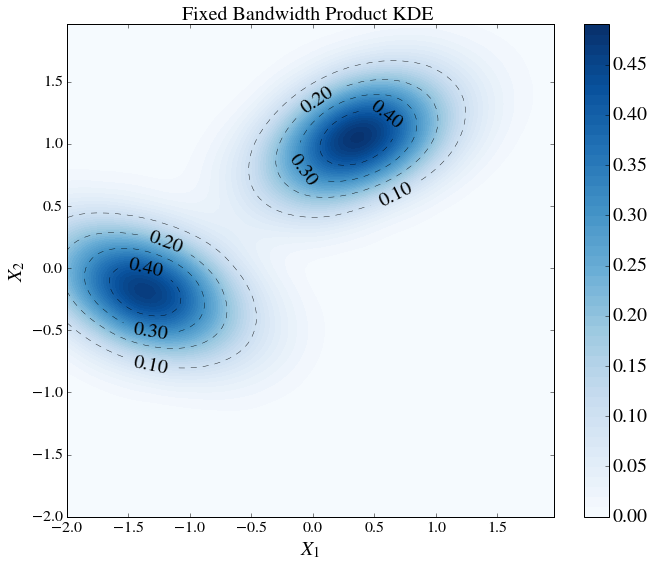

In [4]:
fig = plt.figure(figsize=(24,30))
ax = fig.add_subplot(3,2,1)
plot_kde2d('test_kde3_kde.csv', ax=ax, title=r'Fixed Bandwidth Product KDE ', nlevels=5)